Import Libraries

In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm



Load Dataset

In [14]:
df = pd.read_csv("C:\\Users\\jonga\\Downloads\\regression_features(in).csv")
print(df.shape)
df.head()

(206209, 14)


,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,total_orders,reorder_ratio,mean_days_between_orders,last_order_recency,avg_basket_size,mean_days_last3,avg_basket_size_last3,total_orders_log
0,1,2550362,10,4,8,30,10,0.694915,18.542374,30,5.900000,14.666667,7.000000,2.397895
1,2,839880,14,3,10,13,14,0.476923,14.902564,13,13.928571,23.666666,14.666667,2.708050
2,3,1402502,12,1,15,15,12,0.625000,10.181818,15,7.333333,14.333333,5.666667,2.564949
3,4,2557754,5,5,13,0,5,0.055556,11.944445,0,3.600000,12.000000,4.000000,1.791759
4,5,157374,4,1,18,19,4,0.378378,10.189189,19,9.250000,13.333333,8.666667,1.609438


Define Target & Features

In [15]:
df["days_for_next_order"] = df["days_since_prior_order"]



df["days_for_next_order"] = df["days_for_next_order"].fillna(
df["days_for_next_order"].median()
)


print("After target creation:", df.shape)




After target creation: (206209, 15)


Actual vs Predicted Plot

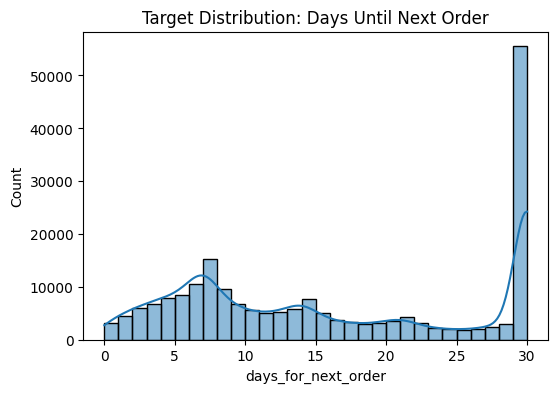

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df["days_for_next_order"], bins=30, kde=True)
plt.title("Target Distribution: Days Until Next Order")
plt.show()

Target (days_to_next_order)

In [17]:
target = "days_for_next_order"
drop_cols = ["days_for_next_order", "order_number"]


X = df.drop(columns=drop_cols)
y = df[target]

Train-Test Split and Model Training

In [18]:

from sklearn.model_selection import train_test_split

n_samples = len(X)

if n_samples < 5:
    
    X_train = X.copy()
    y_train = y.copy()
    X_test = None
    y_test = None
    print("Warning: Dataset too small for train-test split. Using full data for training.")
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        shuffle=False
    )


best_pipeline = models["GradientBoosting"]
best_pipeline.fit(X_train, y_train)




NameError: name 'models' is not defined

Scaling

In [ ]:



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

if X_test is not None:
    X_test_scaled = scaler.transform(X_test)
else:
    X_test_scaled = None






Model Residuals Anlysis

In [ ]:

best_model = models["GradientBoosting"]

best_model.fit(X_train, y_train)


preds = best_model.predict(X_test)
residuals = y_test - preds


plt.figure(figsize=(6,4))
plt.scatter(preds, residuals, alpha=0.4)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()

sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()


Model Pipeline and Performance Comparison 

In [ ]:
models = {
    "Linear": Pipeline([
        ("preprocess", preprocessor),
        ("model", LinearRegression())
    ]),
    "Ridge": Pipeline([
        ("preprocess", preprocessor),
        ("model", Ridge(alpha=1.0))
    ]),
    "Lasso": Pipeline([
        ("preprocess", preprocessor),
        ("model", Lasso(alpha=0.01))
    ]),
    "RandomForest": Pipeline([
        ("preprocess", preprocessor),
        ("model", RandomForestRegressor(
            n_estimators=300,
            max_depth=15,
            min_samples_leaf=10,
            random_state=42,
            n_jobs=-1
        ))
    ]),
    "GradientBoosting": Pipeline([
        ("preprocess", preprocessor),
        ("model", GradientBoostingRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=5,
            random_state=42
        ))
    ])
}
results = {}

for name, model in models.items():
    
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)

    results[name] = {
        "Train_MAE": mean_absolute_error(y_train, train_preds),
        "Train_RMSE": np.sqrt(mean_squared_error(y_train, train_preds)),
        "Train_R2": r2_score(y_train, train_preds)
    }

   
    if X_test is not None and y_test is not None:
        test_preds = model.predict(X_test)
        results[name].update({
            "Test_MAE": mean_absolute_error(y_test, test_preds),
            "Test_RMSE": np.sqrt(mean_squared_error(y_test, test_preds)),
            "Test_R2": r2_score(y_test, test_preds)
        })

results_df = pd.DataFrame(results).T
results_df





 Models (Pipeline-based – Robust)

In [ ]:




import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Select numeric features only
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ],
    remainder="drop"
)


models = {
    "Linear": Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", LinearRegression())
    ]),
    "Ridge": Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", Ridge(alpha=1.0))
    ]),
    "Lasso": Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", Lasso(alpha=0.01))
    ]),
    "RandomForest": Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", RandomForestRegressor(
            n_estimators=300,
            max_depth=15,
            min_samples_leaf=10,
            random_state=42,
            n_jobs=-1
        ))
    ]),
    "GradientBoosting": Pipeline(steps=[
        ("preprocessing", preprocessor),
        ("model", GradientBoostingRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=5,
            random_state=42
        ))
    ])
}



 Heteroscedasticity Test

In [ ]:
 

X_sm = sm.add_constant(preds)
bp_test = het_breuschpagan(residuals, X_sm)
bp_test
labels = ['Lagrange multiplier statistic', 'p-value', 
          'f-value', 'f p-value']

 Feature Importance

In [ ]:



model_core = best_model.named_steps["model"]

importances = pd.Series(
    model_core.feature_importances_, index=X.select_dtypes(include=[np.number]).columns
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
importances.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances – Gradient Boosting")
plt.show()



 Robustness Check (Noise Injection)

In [ ]:






import numpy as np
from sklearn.metrics import mean_squared_error


numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()


X_noise = X_test.copy()


noise = np.random.normal(
    loc=0, 
    scale=0.05 * X_test[numeric_features].std(), 
    size=X_test[numeric_features].shape
)


X_noise[numeric_features] += noise


noise_preds = best_model.predict(X_noise)


rmse_noise = np.sqrt(mean_squared_error(y_test, noise_preds))
print("RMSE with noise:", rmse_noise)
X_noise_small = X_noise.head(500)  
y_test_small = y_test.head(500)

noise_preds = best_model.predict(X_noise_small)
rmse_noise = np.sqrt(mean_squared_error(y_test_small, noise_preds))
print("RMSE with noise (subset):", rmse_noise)


 Model Explainability (SHAP)

In [ ]:



import shap


best_pipeline = models["GradientBoosting"]
best_pipeline.fit(X_train, y_train)


preprocess = best_pipeline.named_steps["preprocessing"]
model = best_pipeline.named_steps["model"]


X_train_proc = preprocess.transform(X_train)

explainer = shap.Explainer(model, X_train_proc)
shap_values = explainer(X_train_proc)


shap.summary_plot(shap_values, X_train_proc, feature_names=numeric_features)


top_feature = numeric_features[0]
shap.dependence_plot(top_feature, shap_values.values, X_train_proc, feature_names=numeric_features)


shap.plots.waterfall(shap_values[0])

from tqdm import tqdm
tqdm.pandas()  


 22%|====                | 36810/164967 [02:33<08:52]       